# Template Model Classification - Dataset Capfiltered

In [1]:
#import semua library yg bakalan dipake di sini, biar rapih
#kalo kurang tambahin aja yaa wkwkwk

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from xgboost import XGBClassifier

In [2]:
df_train_capfiltered = pd.read_csv('processed_dataset/Train/processed_Train_capfiltered.csv')
df_test_capfiltered = pd.read_csv('processed_dataset/Test/processed_Test_capfiltered.csv')

In [3]:
df_train_capfiltered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_care_calls         10500 non-null  float64
 1   Customer_rating             10500 non-null  float64
 2   Cost_of_the_Product         10500 non-null  float64
 3   Prior_purchases             10500 non-null  float64
 4   Discount_offered            10500 non-null  float64
 5   Weight_in_gms               10500 non-null  float64
 6   Gender_encoded              10500 non-null  int64  
 7   Product_importance_encoded  10500 non-null  int64  
 8   Warehouse_block_A           10500 non-null  int64  
 9   Warehouse_block_B           10500 non-null  int64  
 10  Warehouse_block_C           10500 non-null  int64  
 11  Warehouse_block_D           10500 non-null  int64  
 12  Warehouse_block_F           10500 non-null  int64  
 13  Mode_of_Shipment_Flight     105

In [4]:
df_test_capfiltered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_care_calls         8799 non-null   float64
 1   Customer_rating             8799 non-null   float64
 2   Cost_of_the_Product         8799 non-null   float64
 3   Prior_purchases             8799 non-null   float64
 4   Discount_offered            8799 non-null   float64
 5   Weight_in_gms               8799 non-null   float64
 6   Gender_encoded              8799 non-null   int64  
 7   Product_importance_encoded  8799 non-null   int64  
 8   Warehouse_block_A           8799 non-null   int64  
 9   Warehouse_block_B           8799 non-null   int64  
 10  Warehouse_block_C           8799 non-null   int64  
 11  Warehouse_block_D           8799 non-null   int64  
 12  Warehouse_block_F           8799 non-null   int64  
 13  Mode_of_Shipment_Flight     8799 

In [5]:
#split X dan Y 
#moga2 split train sama testnya bener ya KWKWKWKWK

X_train = df_train_capfiltered.drop('arrived_late', axis = 1)
y_train = df_train_capfiltered['arrived_late']
X_test = df_test_capfiltered.drop('arrived_late', axis = 1)
y_test = df_test_capfiltered['arrived_late']

In [6]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
    print('\n------------------------\n')
    print(classification_report(y_test, y_pred))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [7]:
# df.Fraud_Decoded.value_counts(normalize=True)

In [8]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(C, train_scores, label='Train')
    plt.plot(C, test_scores, label='Test')
    plt.legend()
    plt.show()

# AdaBoost (Arsya)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [10]:
ada.fit(X_train,y_train)
eval_classification(ada)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.98
Recall (Test Set): 0.48
F1-Score (Test Set): 0.65
AUC (test-proba): 0.76
AUC (train-proba): 0.76

------------------------

              precision    recall  f1-score   support

           0       0.56      0.99      0.72      3549
           1       0.98      0.48      0.65      5250

    accuracy                           0.69      8799
   macro avg       0.77      0.73      0.68      8799
weighted avg       0.81      0.69      0.67      8799



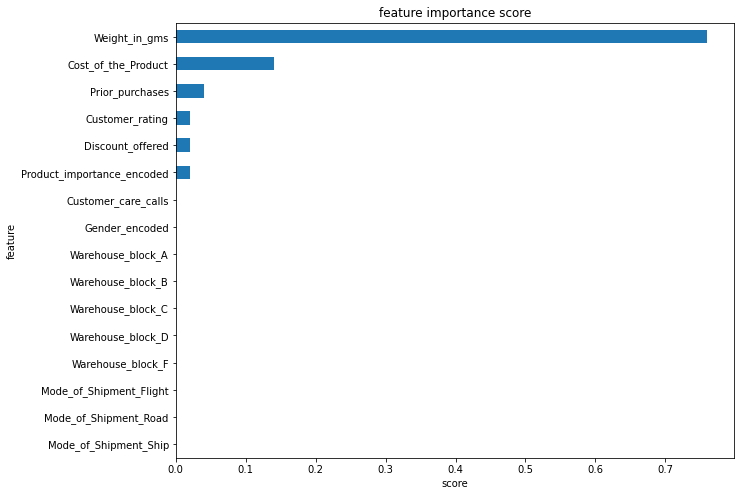

In [11]:
show_feature_importance(ada)

# Logistic Regression

# Decision Tree

In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
eval_classification(dt)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC (test-proba): 1.00
AUC (train-proba): 1.00

------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3549
           1       1.00      1.00      1.00      5250

    accuracy                           1.00      8799
   macro avg       1.00      1.00      1.00      8799
weighted avg       1.00      1.00      1.00      8799



Semua hasil evaluasi memiliki nilai 1.0 hal yang sangat mustahil di dunia nyata, apakah ada kesalahan? Diperlukan tunning untuk mengurangi nilainya.

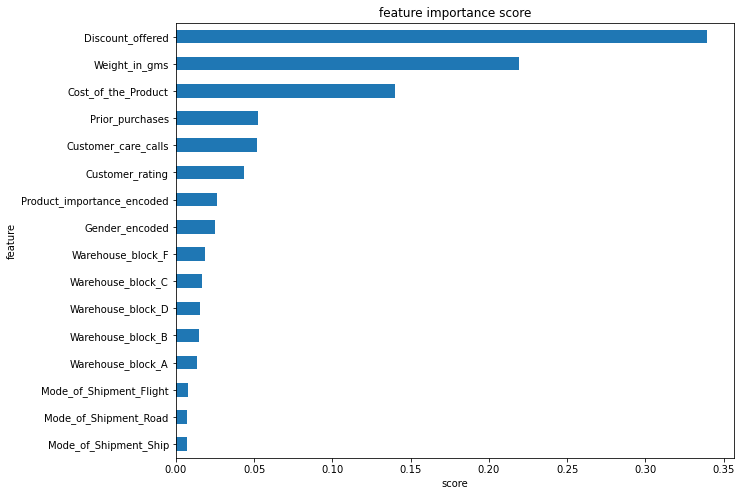

In [13]:
show_feature_importance(dt)

# Random Forest

# K-Nearest Neighbor

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = knn.predict(X_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.67      0.87      0.76      3549\n           1       0.89      0.71      0.79      5250\n\n    accuracy                           0.77      8799\n   macro avg       0.78      0.79      0.77      8799\nweighted avg       0.80      0.77      0.78      8799\n'

In [17]:
eval_classification(knn)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.89
Recall (Test Set): 0.71
F1-Score (Test Set): 0.79
AUC (test-proba): 0.88
AUC (train-proba): 0.89

------------------------

              precision    recall  f1-score   support

           0       0.67      0.87      0.76      3549
           1       0.89      0.71      0.79      5250

    accuracy                           0.77      8799
   macro avg       0.78      0.79      0.77      8799
weighted avg       0.80      0.77      0.78      8799



In [18]:
show_feature_importance(knn)

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

# XGBoost (Riyan)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
eval_classification(xgb)

In [ ]:
show_feature_importance(xgb)